# Finance & Economics Data Analytics Assignment

**Libraries Used:** Pandas, NumPy, Matplotlib, Seaborn

---

## Load Dataset

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/finance_economics_dataset.csv")
df.head()


,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688


## 1. Shape of Dataset

In [2]:
df.shape

(3000, 24)

**Insight:** Shows total number of observations and features.

## 2. Column Names and Data Types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   3000 non-null   object 
 1   Stock Index                            3000 non-null   object 
 2   Open Price                             3000 non-null   float64
 3   Close Price                            3000 non-null   float64
 4   Daily High                             3000 non-null   float64
 5   Daily Low                              3000 non-null   float64
 6   Trading Volume                         3000 non-null   int64  
 7   GDP Growth (%)                         3000 non-null   float64
 8   Inflation Rate (%)                     3000 non-null   float64
 9   Unemployment Rate (%)                  3000 non-null   float64
 10  Interest Rate (%)                      3000 non-null   float64
 11  Cons

**Insight:** Identifies numeric and categorical columns.

## 3. Unique Stock Indices

In [6]:
df['Stock Index'].nunique()

3

**Insight:** Number of distinct market indices.

## 4. Date Range

In [7]:

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'].min(), df['Date'].max()


(Timestamp('2000-01-01 00:00:00'), Timestamp('2008-03-18 00:00:00'))

**Insight:** Covers full time span of data.

## 5. Missing Values

In [8]:
df.isnull().sum()

,0
Date,0
Stock Index,0
Open Price,0
Close Price,0
Daily High,0
Daily Low,0
Trading Volume,0
GDP Growth (%),0
Inflation Rate (%),0
Unemployment Rate (%),0


**Insight:** Highlights incomplete records.

## 6. Negative Values Check

In [9]:

numeric_cols = df.select_dtypes(include='number').columns
(df[numeric_cols] < 0).sum()


,0
Open Price,0
Close Price,0
Daily High,0
Daily Low,0
Trading Volume,0
GDP Growth (%),947
Inflation Rate (%),0
Unemployment Rate (%),0
Interest Rate (%),0
Consumer Confidence Index,0


**Insight:** Some negatives are expected (e.g., GDP growth).

## 7. GDP Growth Summary

In [10]:
df['GDP Growth (%)'].describe()

,GDP Growth (%)
count,3000.000000
mean,2.608903
std,4.287337
min,-5.000000
25%,-1.012500
50%,2.725000
75%,6.242500
max,10.000000


**Insight:** Shows economic growth distribution.

## 8. Zero or Near-Zero Trading Volume

In [11]:
df[df['Trading Volume'] <= 10]

,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)


**Insight:** Indicates low-activity trading days.

## 9. Duplicate Rows

In [12]:
df.duplicated().sum()

np.int64(0)

**Insight:** Ensures data uniqueness.

## 10. Outliers in GDP, Gold, Oil

In [14]:
df[['GDP Growth (%)','Gold Price (USD per Ounce)','Crude Oil Price (USD per Barrel)']].describe()

,GDP Growth (%),Gold Price (USD per Ounce),Crude Oil Price (USD per Barrel)
count,3000.000000,3000.000000,3000.000000
mean,2.608903,1655.167877,85.539953
std,4.287337,492.177706,37.847063
min,-5.000000,800.160000,20.040000
25%,-1.012500,1226.737500,52.590000
50%,2.725000,1666.060000,85.080000
75%,6.242500,2080.730000,119.150000
max,10.000000,2499.660000,149.870000


.**Insight:** Identifies extreme values.

## 11. Inflation Rate Summary

In [15]:
df['Inflation Rate (%)'].describe()

,Inflation Rate (%)
count,3000.000000
mean,5.096830
std,2.910513
min,0.010000
25%,2.607500
50%,5.110000
75%,7.600000
max,10.000000


**Insight:** Measures price stability.

## 12. Average Unemployment Rate

In [16]:
df['Unemployment Rate (%)'].mean()

np.float64(8.663786666666667)

**Insight:** Average labor market condition.

## 13. Highest Trading Volume Index

In [18]:
df.groupby('Stock Index')['Trading Volume'].sum().idxmax()

'S&P 500'

**Insight:** Most actively traded index.

## 14. Records per Stock Index

In [19]:
df['Stock Index'].value_counts()

,count
Stock Index,
S&P 500,1036
NASDAQ,1007
Dow Jones,957


**Insight:** Distribution across indices.

## 15. Inflation vs Interest Rate Correlation

In [20]:
df[['Inflation Rate (%)','Interest Rate (%)']].corr()

,Inflation Rate (%),Interest Rate (%)
Inflation Rate (%),1.000000,0.005733
Interest Rate (%),0.005733,1.000000


**Insight:** Shows monetary policy relation.

## 16. Average Consumer Confidence Index

In [21]:
df['Consumer Confidence Index'].mean()

np.float64(85.036)

**Insight:** Reflects sentiment level.

## 17. Highest Standard Deviation Column

In [22]:
df.select_dtypes(include='number').std().idxmax()

'Trading Volume'

**Insight:** Most volatile indicator.

## 18. Highest Gold Price

In [24]:
df['Gold Price (USD per Ounce)'].max()

2499.66

**Insight:** Peak gold valuation.

## 19. Date with Highest Crude Oil Price

In [26]:
df.loc[df['Crude Oil Price (USD per Barrel)'].idxmax(), 'Date']

Timestamp('2001-11-22 00:00:00')

**Insight:** Peak energy price date.

## 20. Average Corporate Profit

In [28]:
df['Corporate Profits (Billion USD)'].mean()

np.float64(2553.7563333333333)

**Insight:** Average business profitability.

# Insightful Analysis Questions

## Negative GDP Growth Percentage

In [29]:
(df['GDP Growth (%)'] < 0).mean() * 100

np.float64(31.566666666666666)

**Insight:** Frequency of economic contraction.

## Inflation vs Interest Rate

In [30]:
df[['Inflation Rate (%)','Interest Rate (%)']].corr()

,Inflation Rate (%),Interest Rate (%)
Inflation Rate (%),1.000000,0.005733
Interest Rate (%),0.005733,1.000000


**Insight:** Higher inflation aligns with higher rates.

## Unemployment vs Consumer Spending

In [32]:
df[['Unemployment Rate (%)','Consumer Spending (Billion USD)']].corr()

,Unemployment Rate (%),Consumer Spending (Billion USD)
Unemployment Rate (%),1.000000,0.018786
Consumer Spending (Billion USD),0.018786,1.000000


**Insight:** Higher unemployment lowers spending.

## Corporate Profit vs Consumer Confidence

In [34]:
df[['Corporate Profits (Billion USD)','Consumer Confidence Index']].corr()

,Corporate Profits (Billion USD),Consumer Confidence Index
Corporate Profits (Billion USD),1.000000,0.018008
Consumer Confidence Index,0.018008,1.000000


**Insight:** Profits align with confidence.

## Crude Oil Price Trend

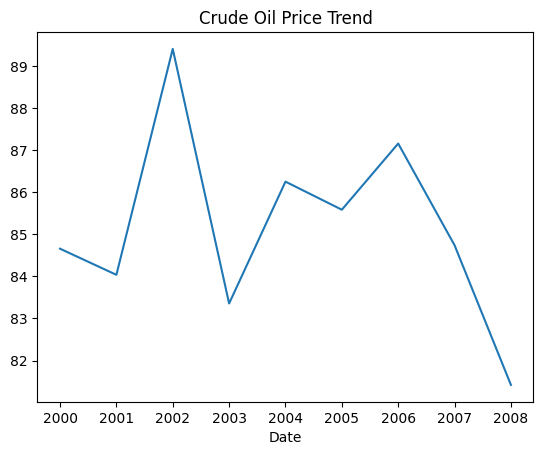

In [36]:

df.groupby(df['Date'].dt.year)['Crude Oil Price (USD per Barrel)'].mean().plot()
plt.title("Crude Oil Price Trend")
plt.show()


**Insight:** Displays long-term oil price movement.

## Gold Price vs Stock Close Price

In [38]:
df[['Gold Price (USD per Ounce)','Close Price']].corr()

,Gold Price (USD per Ounce),Close Price
Gold Price (USD per Ounce),1.000000,-0.014544
Close Price,-0.014544,1.000000


**Insight:** Gold acts as safe haven.

## Government Debt vs Consumer Confidence

In [40]:
df[['Government Debt (Billion USD)','Consumer Confidence Index']].corr()

,Government Debt (Billion USD),Consumer Confidence Index
Government Debt (Billion USD),1.00000,-0.03637
Consumer Confidence Index,-0.03637,1.00000


**Insight:** Debt impacts confidence.

## M&A Activity vs Close Price

In [42]:
df[['Mergers & Acquisitions Deals','Close Price']].corr()

,Mergers & Acquisitions Deals,Close Price
Mergers & Acquisitions Deals,1.000000,0.002637
Close Price,0.002637,1.000000


**Insight:** M&A aligns with growth optimism.

## Retail Sales Growth vs GDP Growth

In [45]:
df[['Retail Sales (Billion USD)','GDP Growth (%)']].corr()

,Retail Sales (Billion USD),GDP Growth (%)
Retail Sales (Billion USD),1.000000,-0.014288
GDP Growth (%),-0.014288,1.000000


**Insight:** Consumer growth drives GDP.

## Stock Performance vs Consumer Spending

In [47]:
df[['Close Price','Consumer Spending (Billion USD)']].corr()

,Close Price,Consumer Spending (Billion USD)
Close Price,1.000000,0.000376
Consumer Spending (Billion USD),0.000376,1.000000


**Insight:** Spending supports stock prices.

## Highest Average Closing Price Index

In [48]:
df.groupby('Stock Index')['Close Price'].mean().idxmax()

'Dow Jones'

**Insight:** Best-performing index.

## Interest Rate vs Unemployment

In [49]:
df[['Interest Rate (%)','Unemployment Rate (%)']].corr()

,Interest Rate (%),Unemployment Rate (%)
Interest Rate (%),1.000000,0.018004
Unemployment Rate (%),0.018004,1.000000


**Insight:** Rate changes affect labor market.

## Consumer Confidence vs Bankruptcy Rate

In [51]:
df[['Consumer Confidence Index','Bankruptcy Rate (%)']].corr()

,Consumer Confidence Index,Bankruptcy Rate (%)
Consumer Confidence Index,1.000000,-0.016313
Bankruptcy Rate (%),-0.016313,1.000000


**Insight:** Low confidence links to bankruptcies.

## Highest Correlation with Close Price

In [52]:

df.select_dtypes(include='number').corr()['Close Price'].sort_values(ascending=False)


,Close Price
Close Price,1.000000
Daily High,0.999821
Daily Low,0.999820
Open Price,0.999688
Retail Sales (Billion USD),0.049370
Bankruptcy Rate (%),0.029380
Venture Capital Funding (Billion USD),0.021414
Interest Rate (%),0.020434
Trading Volume,0.016283
Consumer Confidence Index,0.013482


**Insight:** Identifies main market driver.

## Unemployment vs Corporate Profit

In [54]:
df[['Unemployment Rate (%)','Corporate Profits (Billion USD)']].corr()

,Unemployment Rate (%),Corporate Profits (Billion USD)
Unemployment Rate (%),1.000000,0.008292
Corporate Profits (Billion USD),0.008292,1.000000


**Insight:** Profits coincide with lower unemployment.